In [188]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Building the first independent model

In [17]:
model = pybamm.BaseModel("height model")

# define parameters
w = pybamm.Parameter("Coating width [m]")
u_w = pybamm.Parameter("Web speed [ms-1]")
v = pybamm.Parameter("Volume flow [m3s-1]")
P= pybamm.Parameter("Pressure [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")


# governing equations
model.variables["Coating thickness [m]"] = v / w / u_w
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u))-P

model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)

geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Coating width [m]": 1,
        "Web speed [ms-1]": "[input]",
        "Volume flow [m3s-1]": 1,
        "Pressure [Pa]": 1,
    }
)
values = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
thickness = []


# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}


sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
sol = sim.solve([0, 1], inputs={"Web speed [ms-1]":1})

sim.plot(["Velocity  [ms-1]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

# Having multiple pressures on one plot for the model and normalising the values

Text(0.5, -0.15, 'Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model')

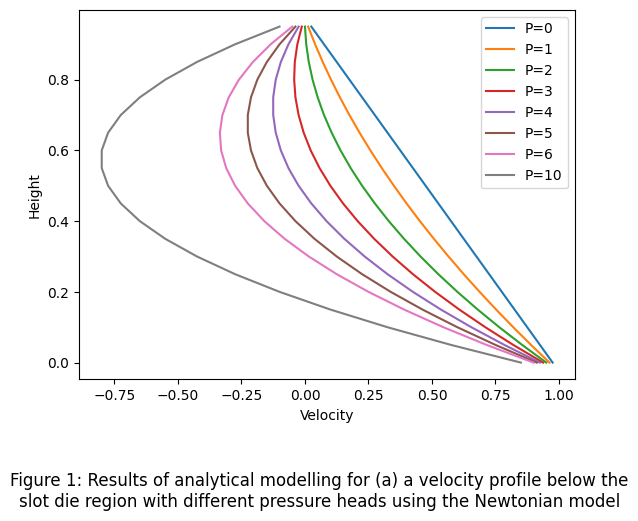

In [99]:
model = pybamm.BaseModel("height model")

# define parameters
P = pybamm.Parameter("Pressure [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")

# governing equations
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u))-P

# boundary conditions
model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)
geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
    }
)

values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
normalised_values = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
pressure = [0,1,2,3,4,5,6,10]

# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}

Coating_velocity = []

#Plots the solution to the model over a range of shear strain values for the given m value
for j in pressure:
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
        sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
        Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

    plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
    Coating_velocity = []

#Figure labels
plt.legend()
plt.ylabel(r"Height")
plt.xlabel(r"Velocity")

#Figure caption
txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the Newtonian model"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)


Text(0.5, -0.15, 'Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model')

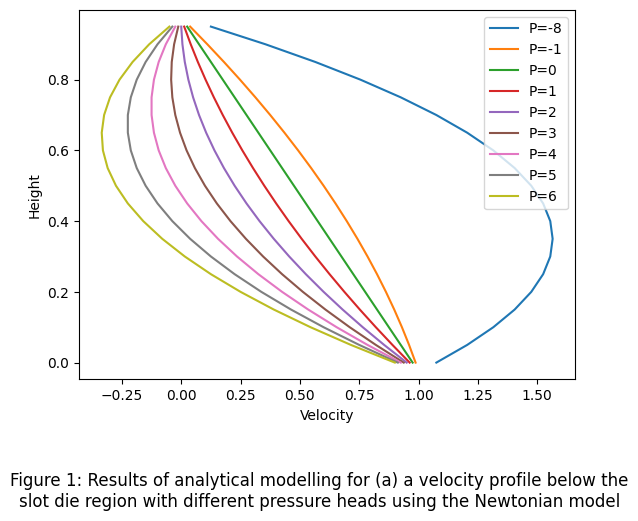

In [111]:
model = pybamm.BaseModel("height model")

# define parameters
P = pybamm.Parameter("Pressure [Pa]")
tau_y = pybamm.Parameter("Yield stress [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")

# governing equations
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u)-tau_y)-P

# boundary conditions
model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)
geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
        "Yield stress [Pa]": 3,
    }
)

values = np.arange(0,20)
normalised_values = values/20
pressure = [-8,-1,0,1,2,3,4,5,6]

# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}

Coating_velocity = []

#Plots the solution to the model over a range of shear strain values for the given m value
for j in pressure:
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
        sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
        Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

    plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
    Coating_velocity = []

#Figure labels
plt.legend()
plt.ylabel(r"Height")
plt.xlabel(r"Velocity")

#Figure caption
txt="Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)


# Putting the model into a callable function

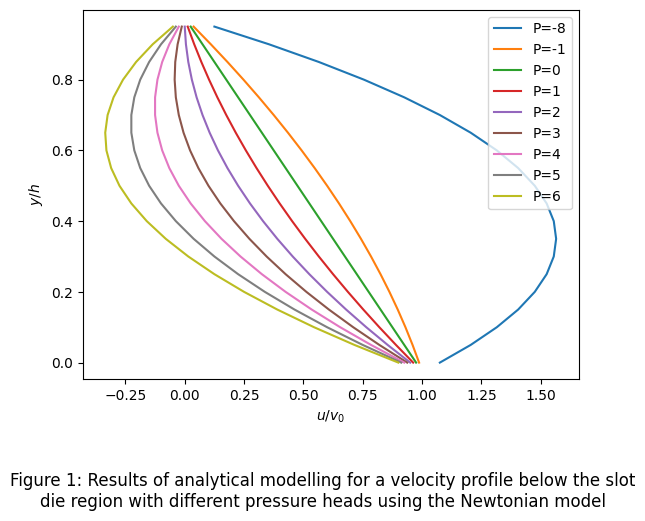

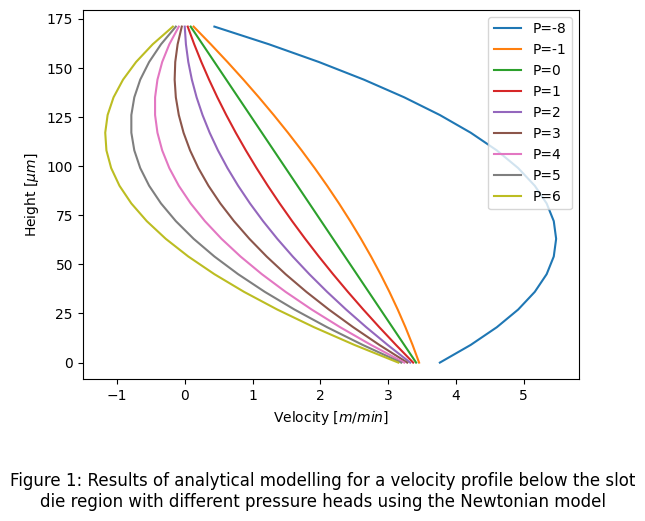

<Figure size 640x480 with 0 Axes>

In [158]:
def velocity_profile(U=1, H_g=1, m_0=1, viscosity="Newtonian", normalised=True, tau_y_input=3, Papanastasiou=False):
    model = pybamm.BaseModel("height model")

    # define parameters
    P = pybamm.Parameter("Pressure [Pa]")
    tau_y = pybamm.Parameter("Yield stress [Pa]")
    m = pybamm.Parameter("Exponent parameter [t]")

    # define variable
    u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")
    grad = pybamm.grad(u)

    # governing equations
    model.variables["Velocity  [ms-1]"] = u
    if Papanastasiou == False:
        if viscosity == "Newtonian":
            model.algebraic[u] = pybamm.div(grad)-P
        elif viscosity == "Herschel-Bulkley" or viscosity == "HB":
            model.algebraic[u] = pybamm.div(grad-tau_y)-P
    elif Papanastasiou == True:
        if viscosity == "Newtonian":
            model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad)))-P
        elif viscosity == "Herschel-Bulkley" or viscosity == "HB":
            model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad))-tau_y)-P

    # boundary conditions
    model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

    # define geometry
    r = pybamm.SpatialVariable(
        "r", domain=["coating"], coord_sys="cartesian"
    )
    geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

    # mesh and discretise
    submesh_types = {"coating": pybamm.Uniform1DSubMesh}
    var_pts = {r: 20}


    spatial_methods = {"coating": pybamm.FiniteVolume()}

    #Add parameters
    param = pybamm.ParameterValues(
        {
            "Pressure [Pa]": "[input]",
            "Yield stress [Pa]": tau_y_input,
            "Exponent parameter [t]": m_0,
        }
    )

    heights = np.arange(0,20)
    normalised_heights = heights/20
    pressure = [-8,-1,0,1,2,3,4,5,6]

    # initial conditions
    model.initial_conditions = {u: pybamm.Scalar(1)}

    Coating_velocity = []

    #Plots the solution to the model over a range of pressures
    for j in pressure:
        for i in heights:
            sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
            sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
            Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

        #Graph plotting
        if normalised == True:
            plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
        elif normalised == False:
            plt.plot(np.array(Coating_velocity)*U, np.array(normalised_heights)*H_g, label = "P={}".format(j))

        Coating_velocity = []

    #Figure labels
    if normalised == 1:
        plt.legend()
        plt.ylabel(r"$y/h$")
        plt.xlabel(r"$u/v_0$")
    elif normalised == 0:
        plt.legend()
        plt.ylabel(r"Height [$\mu m$]")
        plt.xlabel(r"Velocity [$m/min$]")


    #Figure caption
    txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the" + " {} ".format(viscosity) + "model"
    plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

    #Reset the figure
    plt.figure()

velocity_profile(20,30)
velocity_profile(3.5,180, normalised=0)
#velocity_profile(20,30, normalised=0, Papanastasiou=1)


# Creating a class for the liquid and giving the class callable functions for multiple models

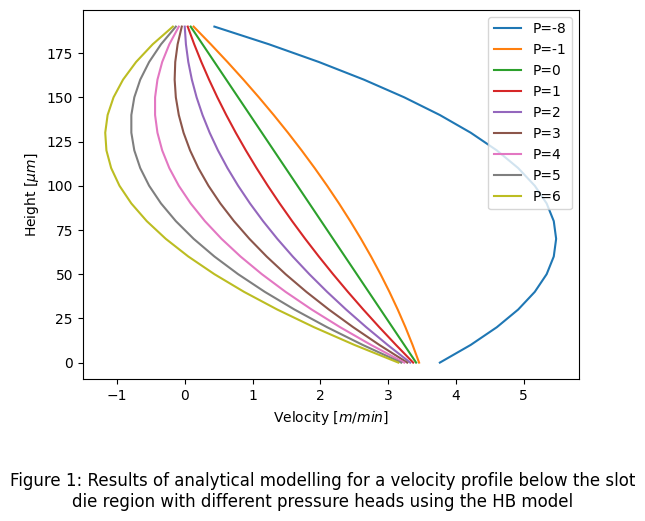

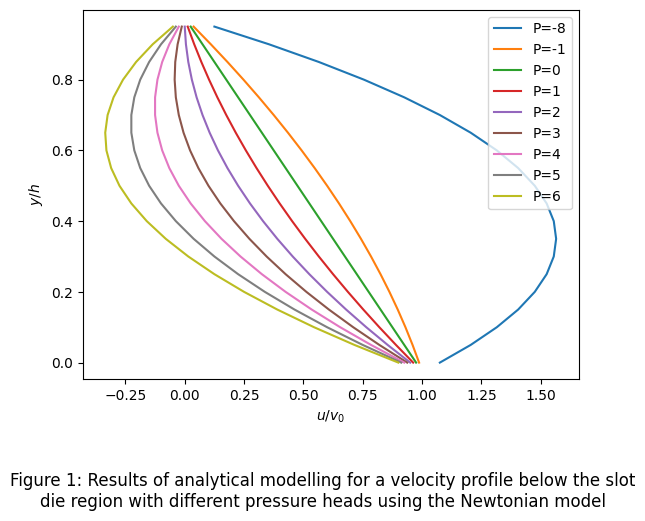

<Figure size 640x480 with 0 Axes>

In [190]:
#Creates a class which has input of the rheological infomation of the liquid for the slot die model. 
class slot_die_model():
    def __init__(self, U_input=1, H_g_input=1, tau_y_input=1, m_input=1, q_input=1, K_input=1, sigma_input=1, n_input=1, viscosity="Newtonian") -> None:
        self.U_input = U_input
        self.H_g_input = H_g_input
        self.tau_y_input = tau_y_input
        self.m_input = m_input
        self.viscosity = viscosity
        self.q_input=q_input
        self.K_input= K_input
        self.sigma_input = sigma_input
        self.n_input = n_input
        

    def velocity_profile(self, normalised=True, Papanastasiou=False):
        model = pybamm.BaseModel("height model")

        # define parameters
        P = pybamm.Parameter("Pressure [Pa]")
        tau_y = pybamm.Parameter("Yield stress [Pa]")
        m = pybamm.Parameter("Exponent parameter [t]")

        # define variable
        u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")
        grad = pybamm.grad(u)

        # governing equations
        model.variables["Velocity  [ms-1]"] = u
        if Papanastasiou == False:
            if self.viscosity == "Newtonian":
                model.algebraic[u] = pybamm.div(grad)-P
            elif self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad-tau_y)-P
        elif Papanastasiou == True:
            if self.viscosity == "Newtonian":
                model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad)))-P
            elif self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad))-tau_y)-P

        # boundary conditions
        model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

        # define geometry
        r = pybamm.SpatialVariable(
            "r", domain=["coating"], coord_sys="cartesian"
        )
        geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

        # mesh and discretise
        submesh_types = {"coating": pybamm.Uniform1DSubMesh}
        var_pts = {r: 20}


        spatial_methods = {"coating": pybamm.FiniteVolume()}

        #Add parameters
        param = pybamm.ParameterValues(
            {
                "Pressure [Pa]": "[input]",
                "Yield stress [Pa]": self.tau_y_input,
                "Exponent parameter [t]": self.m_input,
            }
        )

        heights = np.arange(0,20)
        normalised_heights = heights/20
        pressure = [-8,-1,0,1,2,3,4,5,6]

        # initial conditions
        model.initial_conditions = {u: pybamm.Scalar(1)}

        Coating_velocity = []

        #Plots the solution to the model over a range of pressures
        for j in pressure:
            for i in heights:
                sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
                sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
                Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

            #Graph plotting
            if normalised == True:
                plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
            elif normalised == False:
                plt.plot(np.array(Coating_velocity)*self.U_input, np.array(normalised_heights)*self.H_g_input, label = "P={}".format(j))

            Coating_velocity = []

        #Figure labels
        if normalised == 1:
            plt.legend()
            plt.ylabel(r"$y/h$")
            plt.xlabel(r"$u/v_0$")
        elif normalised == 0:
            plt.legend()
            plt.ylabel(r"Height [$\mu m$]")
            plt.xlabel(r"Velocity [$m/min$]")


        #Figure caption
        txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the" + " {} ".format(self.viscosity) + "model"
        plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

        #Reset the figure
        plt.figure()





model_1 = slot_die_model(U_input=3.5,H_g_input=200, viscosity="HB")
model_1.velocity_profile(normalised = 0)


model_2 = slot_die_model(U_input=3.5,H_g_input=180)
model_2.velocity_profile(normalised = 1)



# Adding other functions to the class such as coating_window

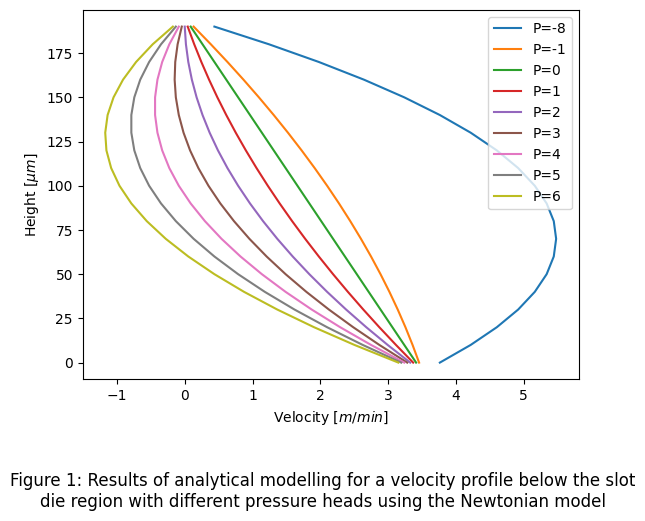

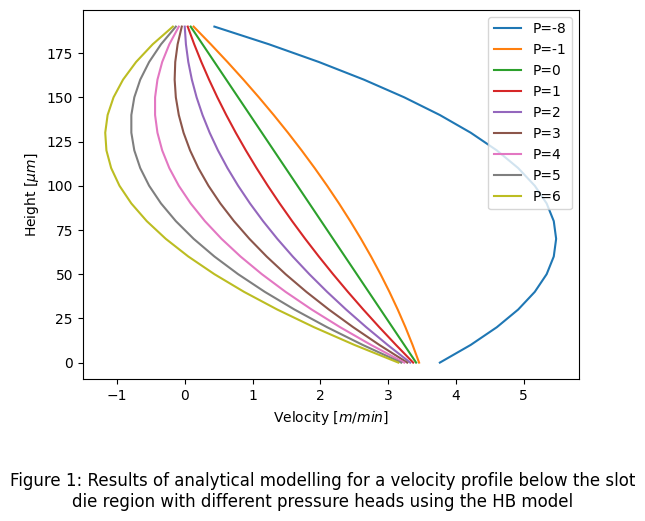

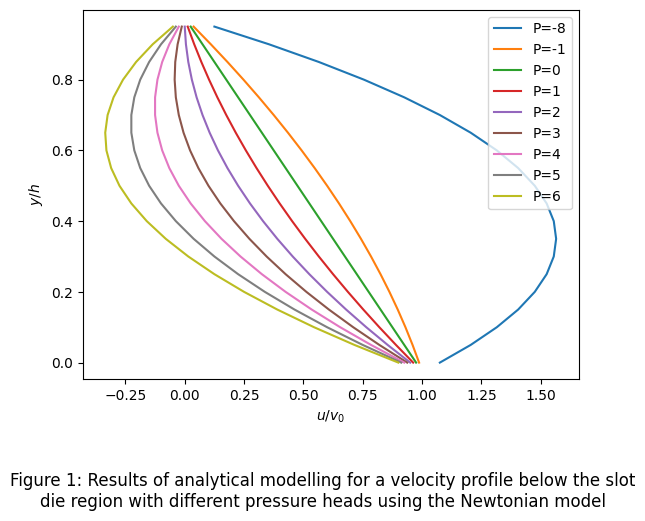

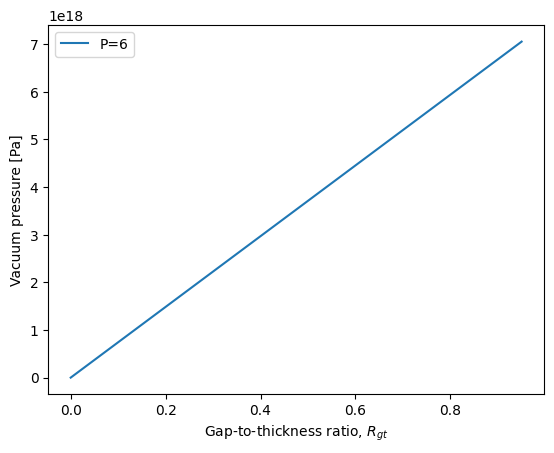

In [207]:
#Creates a class which has input of the rheological infomation of the liquid for the slot die model. 
class slot_die_model():
    def __init__(self, U_input=1, H_g_input=1, tau_y_input=1, m_input=1, q_input=1, K_input=1, sigma_input=1, n_input=1, viscosity="Newtonian") -> None:
        self.U_input = U_input
        self.H_g_input = H_g_input
        self.tau_y_input = tau_y_input
        self.m_input = m_input
        self.viscosity = viscosity
        self.q_input=q_input
        self.K_input= K_input
        self.sigma_input = sigma_input
        self.n_input = n_input
        

    def velocity_profile(self, normalised=True, Papanastasiou=False):
        model = pybamm.BaseModel("height model")

        # define parameters
        P = pybamm.Parameter("Pressure [Pa]")
        tau_y = pybamm.Parameter("Yield stress [Pa]")
        m = pybamm.Parameter("Exponent parameter [t]")

        # define variable
        u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")
        grad = pybamm.grad(u)

        # governing equations
        model.variables["Velocity  [ms-1]"] = u
        if Papanastasiou == False:
            if self.viscosity == "Newtonian":
                model.algebraic[u] = pybamm.div(grad)-P
            elif self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad-tau_y)-P
        elif Papanastasiou == True:
            if self.viscosity == "Newtonian":
                model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad)))-P
            elif self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad))-tau_y)-P

        # boundary conditions
        model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

        # define geometry
        r = pybamm.SpatialVariable(
            "r", domain=["coating"], coord_sys="cartesian"
        )
        geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

        # mesh and discretise
        submesh_types = {"coating": pybamm.Uniform1DSubMesh}
        var_pts = {r: 20}


        spatial_methods = {"coating": pybamm.FiniteVolume()}

        #Add parameters
        param = pybamm.ParameterValues(
            {
                "Pressure [Pa]": "[input]",
                "Yield stress [Pa]": self.tau_y_input,
                "Exponent parameter [t]": self.m_input,
            }
        )

        heights = np.arange(0,20)
        normalised_heights = heights/20
        pressure = [-8,-1,0,1,2,3,4,5,6]

        # initial conditions
        model.initial_conditions = {u: pybamm.Scalar(1)}

        Coating_velocity = []

        #Plots the solution to the model over a range of pressures
        for j in pressure:
            for i in heights:
                sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
                sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
                Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

            #Graph plotting
            if normalised == True:
                plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
            elif normalised == False:
                plt.plot(np.array(Coating_velocity)*self.U_input, np.array(normalised_heights)*self.H_g_input, label = "P={}".format(j))

            Coating_velocity = []

        #Figure labels
        if normalised == 1:
            plt.legend()
            plt.ylabel(r"$y/h$")
            plt.xlabel(r"$u/v_0$")
        elif normalised == 0:
            plt.legend()
            plt.ylabel(r"Height [$\mu m$]")
            plt.xlabel(r"Velocity [$m/min$]")


        #Figure caption
        txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the" + " {} ".format(self.viscosity) + "model"
        plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

        #Reset the figure
        plt.figure()

    def coating_window(self):
        model = pybamm.BaseModel("Coating window")
        
        # define parameters
        H_g = pybamm.Parameter("Coating Gap [m]")
        U = pybamm.Parameter("Coating speed [m/min]")
        K = pybamm.Parameter("Consistency index [Pa s^n]")
        q = pybamm.Parameter("Flow rate []")
        n = pybamm.Parameter("Power law index")
        sigma = pybamm.Parameter("Surface tension [Nm-1]")
        tau_y = pybamm.Parameter("Yield stress [Pa]")
        R_gt = pybamm.Parameter("Gap-to-thickness ratio")


        # governing equations
        model.variables["Pressure change [Pa]"] = K*R_gt**((2*n+1)*1/3)*((K*(U*1/H_g)**(n-1))*1/sigma)**(-1/3)+(tau_y*1/(K*(U*1/H_g)**n))*R_gt

        #Add parameters
        param = pybamm.ParameterValues(
            {
                "Coating Gap [m]": self.H_g_input,
                "Coating speed [m/min]": self.U_input,
                "Consistency index [Pa s^n]": self.K_input,
                "Flow rate []": self.q_input,
                "Power law index": self.n_input,
                "Surface tension [Nm-1]": self.sigma_input,
                "Yield stress [Pa]": self.tau_y_input,
                "Gap-to-thickness ratio": "[input]"
            }
        )

        R_gt_vals = np.arange(0,20)
        normalised_R_gt_vals = R_gt_vals/20
        Pressure_change = []

        #Plots the solution to the model over a range of shear strain values
        for i in R_gt_vals:
            sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
            sol = sim.solve([0, 1], inputs={"Gap-to-thickness ratio": R_gt_vals[i]})
            Pressure_change.append(sol["Pressure change [Pa]"].entries[0])

        #Graph plotting
        plt.plot(normalised_R_gt_vals, Pressure_change, label = "P={}".format(j))

        Pressure_change = []

        plt.legend()
        plt.ylabel(r"Vacuum pressure [Pa]")
        plt.xlabel(r"Gap-to-thickness ratio, $R_{gt}$")
    
#    def coating_thickness(self):
    
#    def rheological_plot(self): 





model_1 = slot_die_model(U_input=3.5, H_g_input=200, tau_y_input=1, m_input=1, q_input=1, K_input=1, sigma_input=1, n_input=10, viscosity="Newtonian")
model_1.velocity_profile(normalised = 0)

model_2 = slot_die_model(U_input=3.5, H_g_input=200, tau_y_input=1, m_input=1, q_input=1, K_input=1, sigma_input=1, n_input=10, viscosity="HB")
model_2.velocity_profile(normalised = 0)


model_2 = slot_die_model(U_input=3.5,H_g_input=180)
model_2.velocity_profile(normalised = 1)

model_1.coating_window()

